In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
data1["target"].unique()

array([0., 1., 2.])

In [15]:
df = data1.loc[(data1['target'] == 0) | (data1['target'] == 1)]

In [18]:
df["target"].unique()

array([0., 1.])

In [20]:
X = df.drop("target", axis=1)
y = df["target"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

TO SCREEN:
- XGBoost
- Random Forest
- Decision Tree
- Bagging
- LightGBM
- SVM
- KNN
- Naive Bayes
- Logistic Regression
- BaseModel

EVALUATION TO DO:
- Confusion Matrix
- Accuracy
- F1 Score
- Sensitivity
- Specificity
- ROC Curve
- ROC AUC score

In [ ]:
import data_prep
data = pd.read_csv("marketing_campaign.csv")

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [ ]:
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
"""print("Accuracy reached on test data:", acc)
print("F1 score reached on test data:", f1)
print("Sensitivity reached on test data:", sensitivity)
print("Specificty reached on test data:", specificity)"""
"""
sns.heatmap(cm, annot = True)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    """

In [40]:
def evaluate_model(actual, predicted, class_proba):
    cm = confusion_matrix(y_true = actual, y_pred = predicted)
    acc = accuracy_score(y_true = actual, y_pred = predicted) 
    f1 = f1_score(y_true = actual, y_pred = predicted)
    sensitivity = sensitivity_score(y_true = actual, y_pred = predicted)
    specificity = specificity_score(y_true = actual, y_pred = predicted)
    fpr, tpr, threshold = roc_curve(y_test, class_proba)
    roc_auc = auc(fpr, tpr)

    return cm, acc, f1, sensitivity, specificity, fpr, tpr, roc_auc

### Dummy Classifier

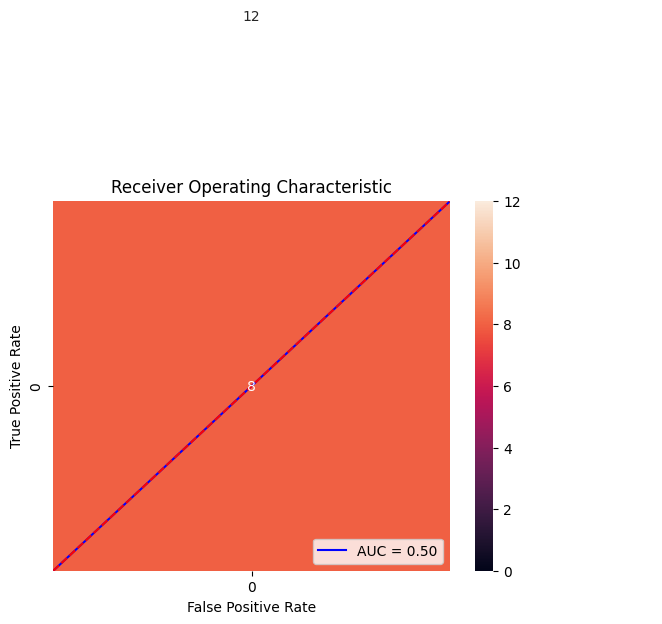

In [41]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
class_probabilities = dummy.predict_proba(X_test)
preds = class_probabilities[:, 1]
dummy_eval = evaluate_model(y_test, dummy_pred, preds)